In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.qda import QDA
from sklearn.lda import LDA
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

/home/gelkin/Development/anaconda3/lib/python3.5/site-packages/sklearn/qda.py:6: DeprecationWarning: qda.QDA has been moved to discriminant_analysis.QuadraticDiscriminantAnalysis in 0.17 and will be removed in 0.19.
  "in 0.17 and will be removed in 0.19.", DeprecationWarning)
/home/gelkin/Development/anaconda3/lib/python3.5/site-packages/sklearn/lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


In [2]:
path = "./Data/"
white_wine_filename = "winequality-white.csv"

In [3]:
df_white = pd.read_csv(path + white_wine_filename, sep=';')

In [4]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
matrix = df_white.as_matrix()

In [6]:
X = matrix[:, :-1]
y = matrix[:, -1]

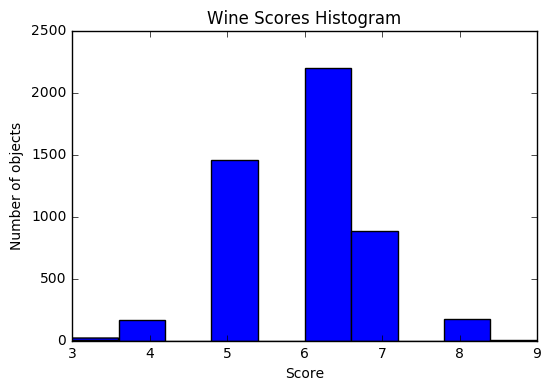

In [7]:
plt.hist(y)
plt.title("Wine Scores Histogram")
plt.xlabel("Score")
plt.ylabel("Number of objects")
plt.show()

## So let's make following grouping for classification:
1. Remove wines with score 3 and 9
2. Groups: {4 $\cup$ 5}, {6}, {7 $\cup$ 8}

In [8]:
indexes = np.argwhere(np.logical_and(y != 9, y != 3))[:,:1]

In [9]:
X = X[indexes]
y = y[indexes]

In [10]:
X = X.reshape(X.shape[0], X.shape[2])

In [18]:
def inc_scores(x):
    if x == 4:
        return x + 1
    elif x == 8:
        return x - 1
    return x
vec_inc_scores = np.vectorize(inc_scores)

In [19]:
y = vec_inc_scores(y)
y = y.reshape(y.shape[0])

In [20]:
y.shape

(4873,)

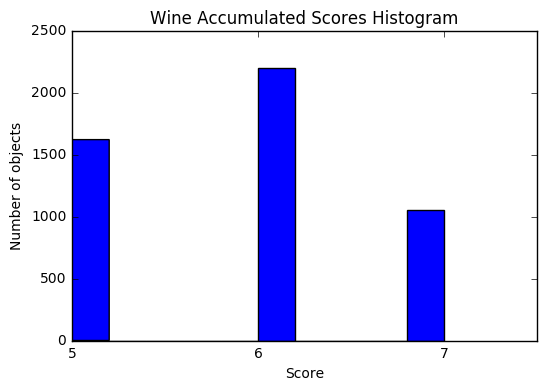

In [21]:
plt.hist(y)
plt.title("Wine Accumulated Scores Histogram")
plt.xlabel("Score")
plt.ylabel("Number of objects")
plt.xticks([5, 6, 7])
plt.show()

In [22]:
# preprocess data
minmax_scaler = preprocessing.MinMaxScaler()
X_scaled = minmax_scaler.fit_transform(X)

# Try classifiers:

### LDA & QDA

In [23]:
lda_cls = LDA()

In [24]:
scores = cross_val_score(lda_cls, X_scaled, y, cv=10)
print("Accuracy: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std() * 2))

Accuracy: 0.56 (+/- 0.07)


In [25]:
qda_cls = QDA()
scores = cross_val_score(qda_cls, X_scaled, y, cv=10)
print("Accuracy: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std() * 2))

Accuracy: 0.51 (+/- 0.07)


### KNeighborsClassifier

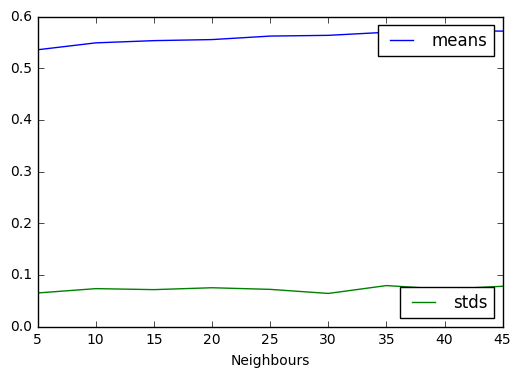

In [27]:
neighbours = range(5, 50, 5)
means = []
stds = []
for i in neighbours:
    cls = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(cls, X_scaled, y, cv=10)
    means.append(scores.mean())
    stds.append(scores.std() * 2)

mean_line, = plt.plot(neighbours, means, label='means')
stds_line, = plt.plot(neighbours, stds, label='stds')
first_legend = plt.legend(handles=[mean_line], loc=1)
plt.gca().add_artist(first_legend)
plt.legend(handles=[stds_line], loc=4)
plt.xlabel("Neighbours")
plt.show()

### SVM

In [28]:
cls = SVC()

scores = cross_val_score(cls, X_scaled, y, cv=10)
print("Accuracy: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std() * 2))

Accuracy: 0.54 (+/- 0.08)


### RandomForestClassifier

In [30]:
cls = RandomForestClassifier()

scores = cross_val_score(cls, X_scaled, y, cv=10)
print("Accuracy: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std() * 2))

Accuracy: 0.54 (+/- 0.06)


### DecisionTreeClassifier

In [31]:
cls = DecisionTreeClassifier()

scores = cross_val_score(cls, X_scaled, y, cv=10)
print("Accuracy: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std() * 2))

Accuracy: 0.48 (+/- 0.05)


### Naive Bayes

In [32]:
cls = GaussianNB()

scores = cross_val_score(cls, X_scaled, y, cv=10)
print("Accuracy: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std() * 2))

Accuracy: 0.49 (+/- 0.08)
